In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

In [2]:
# fixed histology
f22 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171010.xls'
# f22 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/aaaa.xls'
cdf = pd.read_excel(f22, sheetname='mutation_load', index_col='patient')
cdf.head(2)


,indel,snv,sum,log10_strelka_total,reanne_Putative_histology,reanne_HIV_status,birth_days_to,menopause_status,height_cm_at_diagnosis,weight_kg_at_diagnosis,...,haart_therapy_prior_to_dx,haart_therapy_at_dx,age_at_diagnosis,keratinization_squamous_cell,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,days_to_hiv_diagnosis,patient_id,combo
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,1242,25732,26974,4.430945,Squamous,Positive,NaN,Post (prior bilateral ovariectomy OR >12 mo si...,158.0,44.5,...,YES,YES,56.0,Non-keratinizing squamous cell carcinoma,G2,T2b,Stage IIB,NaN,2001.0,Squamous+
HTMCP-03-06-02002,697,15964,16661,4.221701,Squamous,Negative,-22934.0,Post (prior bilateral ovariectomy OR >12 mo si...,159.0,70.2,...,NaN,NaN,62.0,Non-keratinizing squamous cell carcinoma,G3,T1b1,Stage IB1,NaN,2002.0,Squamous-


In [27]:
for i in cdf.columns:
    print(i)

indel
snv
sum
log10_strelka_total
reanne_Putative_histology
reanne_HIV_status
birth_days_to
menopause_status
height_cm_at_diagnosis
weight_kg_at_diagnosis
history_hormonal_contraceptives_use
live_birth_pregnancy_count
total_pregnancy_count
pregnancies_count_miscarriage
pregnancies_count_induced_abortion
karnofsky_score
tobacco_smoking_history_indicator
ecog_score
Unnamed: 19
nadir_cd4_counts
cd4_counts_at_diagnosis
hiv_rna_load_at_diagnosis
histologic_diagnosis
haart_therapy_prior_to_dx
haart_therapy_at_dx
age_at_diagnosis
keratinization_squamous_cell
tumor_grade
ajcc_tumor_clinical_ct
clinical_stage
days_to_hiv_diagnosis
patient_id
combo


In [45]:
cdf.shape

(106, 33)

In [39]:
cdf.haart_therapy_prior_to_dx.dropna().value_counts()

YES    35
NO      7
Name: haart_therapy_prior_to_dx, dtype: int64

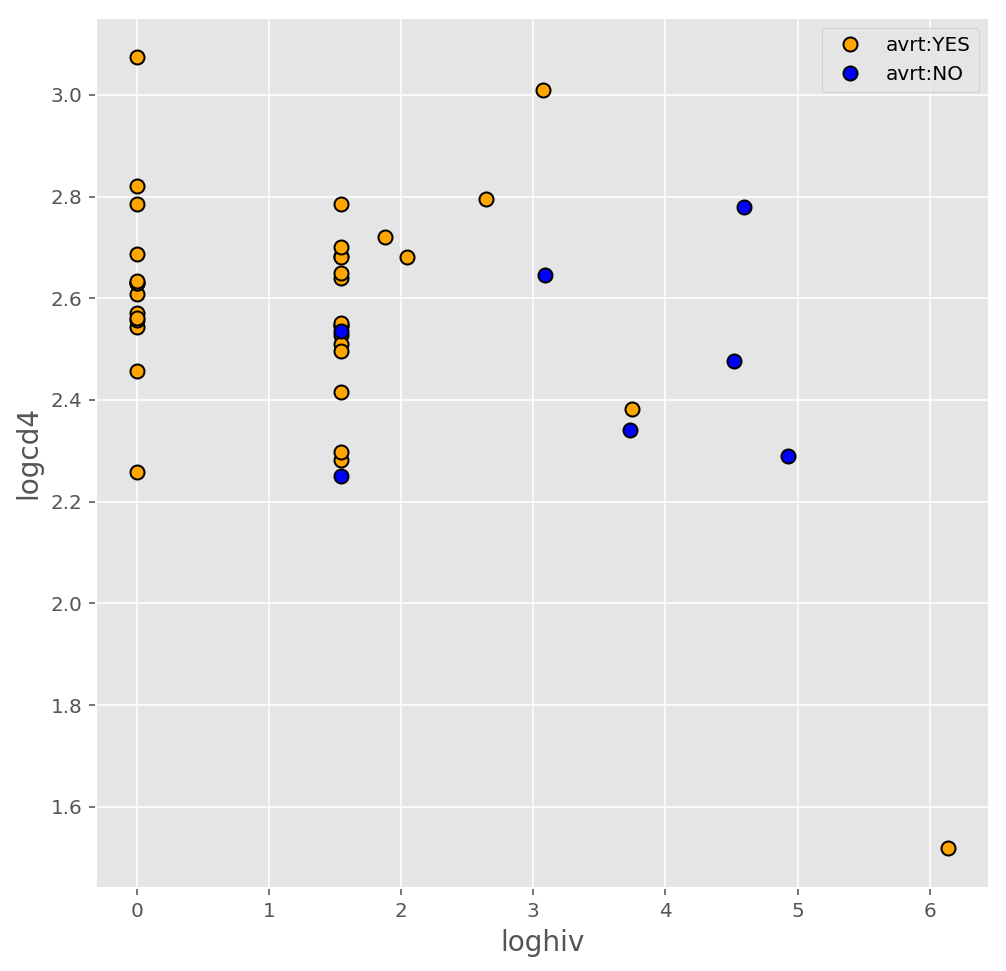

In [48]:
# look at hiv rna load and cd4 counts
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
dftmp = cdf.query('reanne_HIV_status == "Positive"')[['hiv_rna_load_at_diagnosis', 'cd4_counts_at_diagnosis', 'haart_therapy_prior_to_dx']].dropna()

# dftmp.hiv_rna_load_at_diagnosis.describe()
dftmp['loghiv'] = np.log10(dftmp.hiv_rna_load_at_diagnosis + 1)
dftmp['logcd4'] = np.log10(dftmp.cd4_counts_at_diagnosis)
# dftmp.plot('loghiv', 'logcd4', kind='scatter', xlim=(0,8))

for j, arvt in enumerate(['YES', 'NO']):
    x = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['loghiv']
    y = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['logcd4']
    _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                mec='k', ms=7, marker="o", linestyle="None", label='{0}:{1}'.format('avrt', arvt))
    _= ax.set_xlabel('loghiv', fontsize=14)
    _= ax.set_ylabel('logcd4', fontsize=14)
ax.legend()

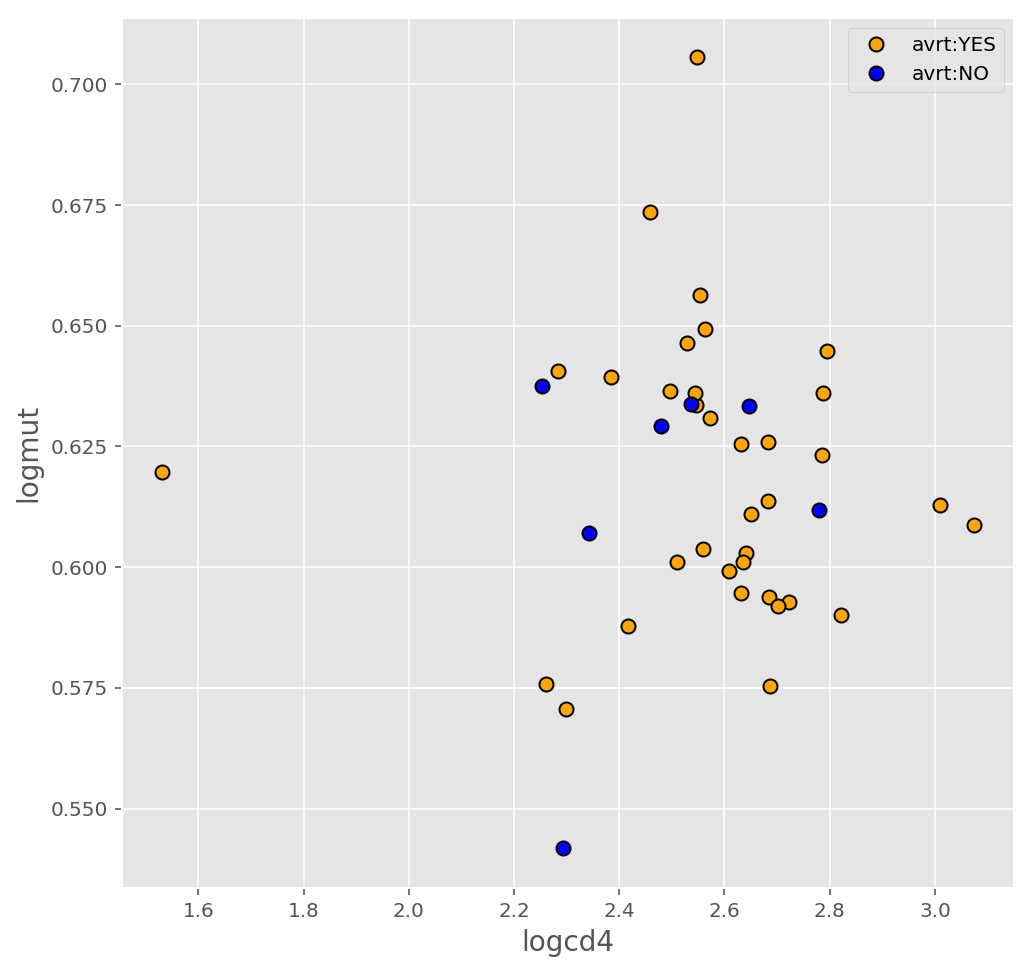

In [49]:
# look at hiv rna load and cd4 counts
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
dftmp = cdf.query('reanne_HIV_status == "Positive"')[['cd4_counts_at_diagnosis', 'log10_strelka_total', 'haart_therapy_prior_to_dx']].dropna()

# dftmp.cd4_counts_at_diagnosis.describe()
dftmp['logcd4'] = np.log10(dftmp.cd4_counts_at_diagnosis + 1)
dftmp['logmut'] = np.log10(dftmp.log10_strelka_total)
# dftmp.plot('loghiv', 'logcd4', kind='scatter', xlim=(0,8))

for j, arvt in enumerate(['YES', 'NO']):
    x = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['logcd4']
    y = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['logmut']
    _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                mec='k', ms=7, marker="o", linestyle="None", label='{0}:{1}'.format('avrt', arvt))
    _= ax.set_xlabel('logcd4', fontsize=14)
    _= ax.set_ylabel('logmut', fontsize=14)
ax.legend()

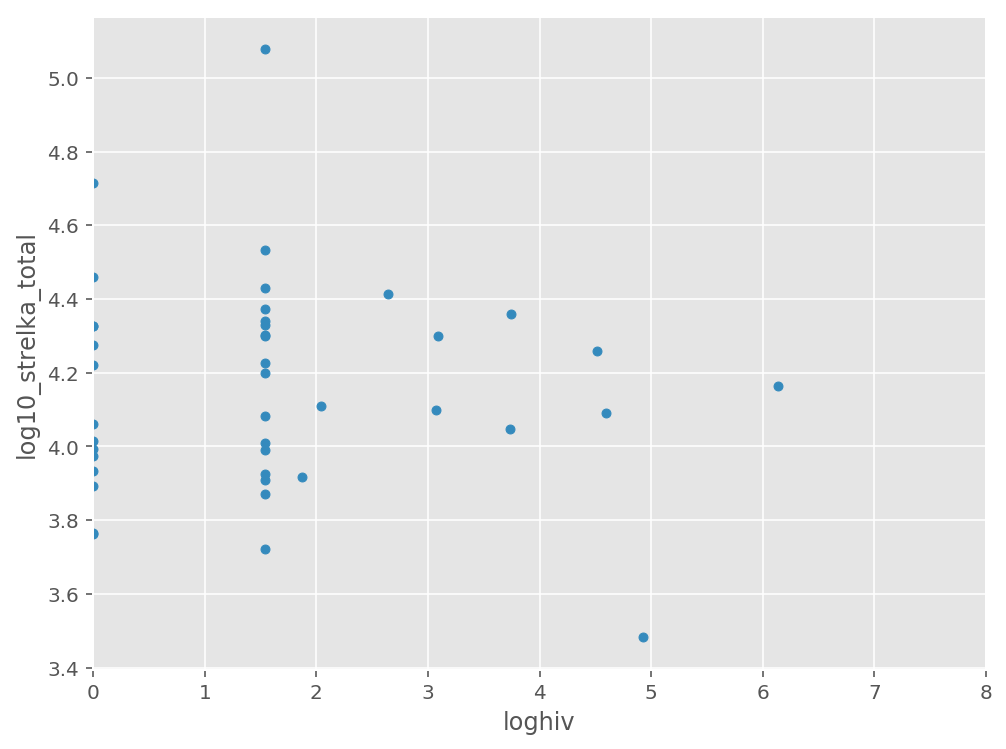

In [26]:
# look at hiv rna load and cd4 counts
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
dftmp = cdf.query('reanne_HIV_status == "Positive"')[['hiv_rna_load_at_diagnosis', 'log10_strelka_total', 'haart_therapy_prior_to_dx']].dropna()

# dftmp.hiv_rna_load_at_diagnosis.describe()
dftmp['loghiv'] = np.log10(dftmp.hiv_rna_load_at_diagnosis + 1)
dftmp['logmut'] = np.log10(dftmp.log10_strelka_total)
# dftmp.plot('loghiv', 'logcd4', kind='scatter', xlim=(0,8))

for j, arvt in enumerate(['YES', 'NO']):
    x = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['loghiv']
    y = dftmp.query('{0}=="{1}"'.format('haart_therapy_prior_to_dx', arvt))['logmut']
    _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                mec='k', ms=7, marker="o", linestyle="None", label='{0}:{1}'.format('avrt', arvt))
    _= ax.set_xlabel('loghiv', fontsize=14)
    _= ax.set_ylabel('logmut', fontsize=14)
ax.legend()


In [15]:
# cdf['tmp'] = cdf.reanne_HIV_status.apply(lambda x: '-' if x == 'Negative' else '+')

# cdf['combo'] = cdf.reanne_Putative_histology + cdf.tmp


# cdf = cdf.drop('tmp', axis=1)

# cdf = cdf.fillna('NA')


# of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutation_load_new.csv'
# cdf.to_csv(of2, sep='\t')

# cdf.head()

0 0 is 0.07790018288486533
0 1 is 0.2482748093769424


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


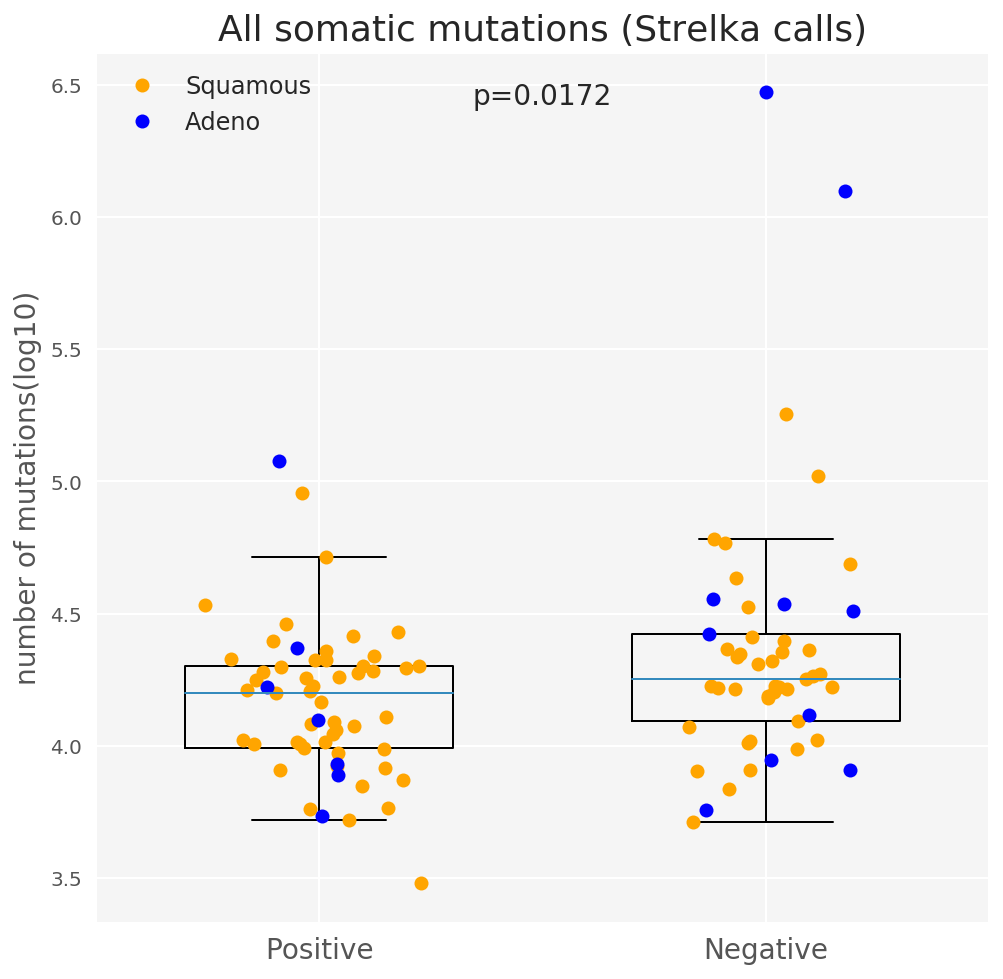

In [110]:
df = cdf.copy()
# value_cols = ['log10_strelka_total', 'sum']
value_cols = ['log10_strelka_total']
# titles = ['All somatic mutations (Strelka calls)', 'sum']
titles = ['All somatic mutations (Strelka calls)']
# boxplot overlaps individual data point
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
# axes = axes.ravel()
# group_col = 'combo'
group_col = 'reanne_HIV_status'
tissue_col = 'reanne_Putative_histology'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
#     ax = axes[k]
    ax=axes
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
            lb = '' if i == 0 else tissue
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
#         show the unequal variance of each group, not equal
        print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
    # statistical test for 1st grp
    stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
#     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
    p_U = round(p_U, 4)
#     p_T = round(p_T, 4)
    _ = ax.text(0.5, 0.95,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
#     _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
    ax.grid(True)
    _ = ax.legend(scatterpoints=1,
              loc='upper left',
              ncol=1,
              fontsize=12)
plt.suptitle('', fontsize=14)  
of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_1.png'
# plt.savefig(of1, dpi=200)


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


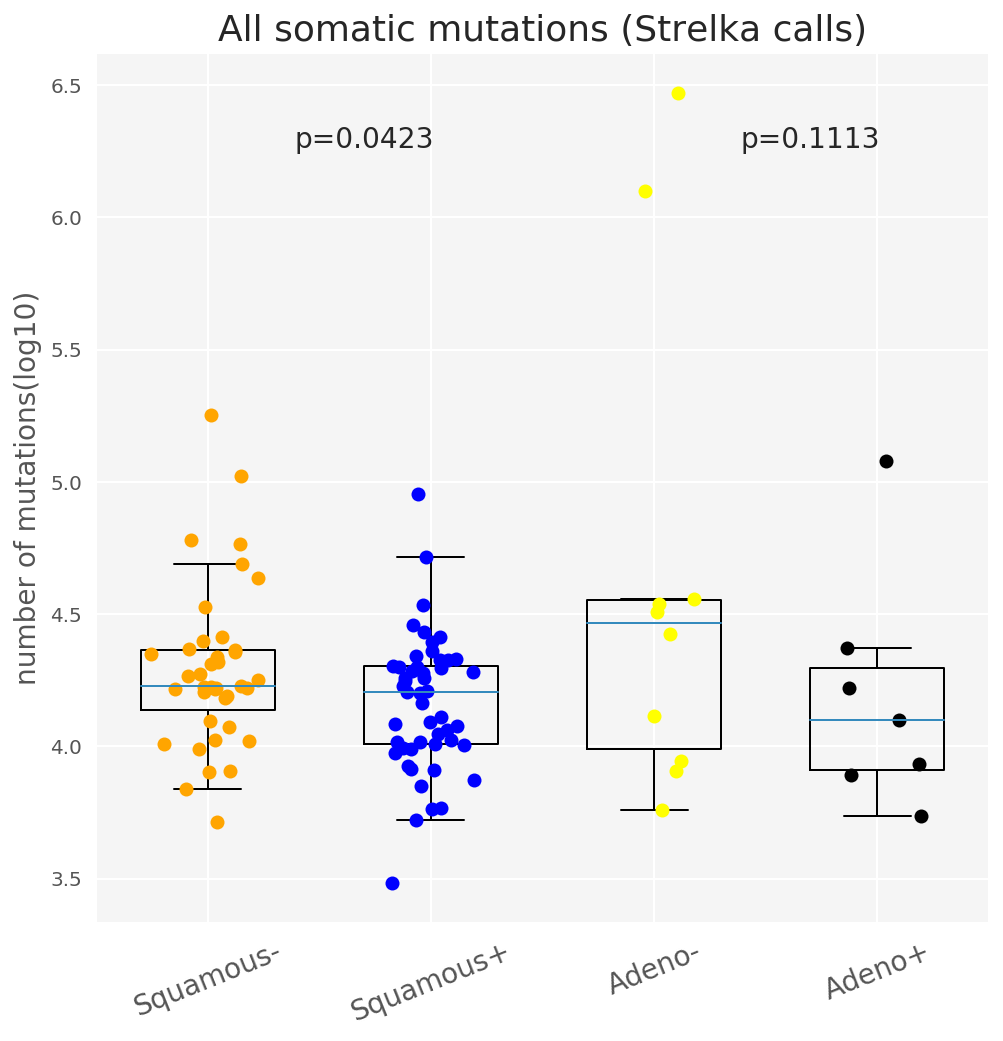

In [111]:
# separate into squamous and adeno, test HIV status difference.
value_cols = ['log10_strelka_total']
titles = ['All somatic mutations (Strelka calls)']
# boxplot overlaps individual data point
fig, axes = plt.subplots(1,1, figsize=(8, 8))
# axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.3, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=22, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_2.png'
plt.savefig(of1, dpi=200)


In [54]:
ndf = cdf[cdf.age_at_diagnosis.notnull()]

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


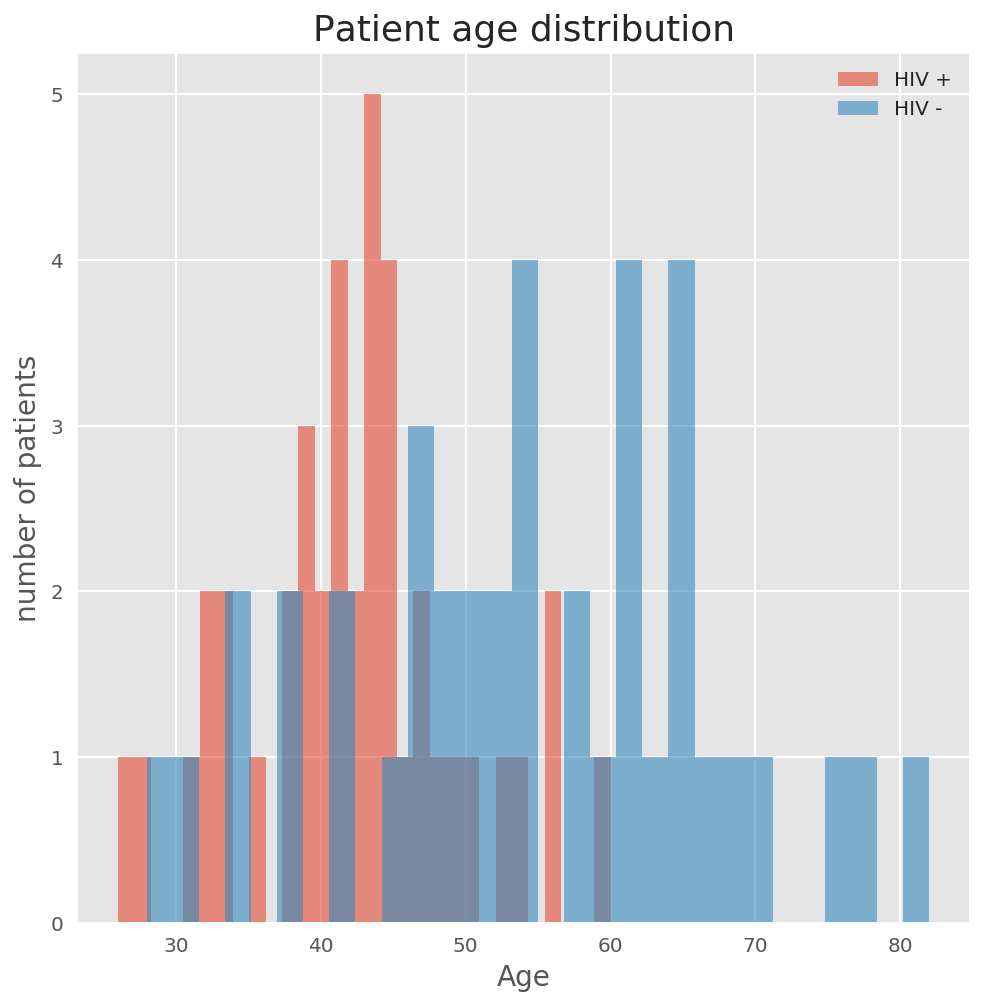

In [112]:
# fig, ax = plt.subplots(figsize=(8, 6))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
_ = ax.hist(ndf.query('reanne_HIV_status == "Positive"')['age_at_diagnosis'], bins=30,alpha=0.6, label='HIV +')
_ = ax.hist(ndf.query('reanne_HIV_status == "Negative"')['age_at_diagnosis'], bins=30, alpha=0.6, label='HIV -')
# ndf.query('hiv_status == "Positive"')['age_at_diagnosis'].hist(bins=30,alpha=0.6, label='HIV +')
# ndf.query('hiv_status == "Negative"')['age_at_diagnosis'].hist(bins=30, alpha=0.6, label='HIV -')
_ = plt.legend(loc='upper right')
plt.title('Patient age distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('number of patients',fontsize=14)

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_age_3.png'
plt.savefig(of1, dpi=200)

In [89]:
# number of presentable pMHC associated with mutation load?
ndf[['age_at_diagnosis', 'sum']].corr(method='spearman', min_periods=1)
cor, p = ss.spearmanr(ndf.age_at_diagnosis, ndf['sum'])
cor = "{0:.4f}".format(round(cor, 4))
p = "{0:.4f}".format(round(p, 4))

,age_at_diagnosis,sum
age_at_diagnosis,1.000000,0.221262
sum,0.221262,1.000000


In [102]:
ss.spearmanr?

In [101]:
ss.spearmanr(ndf.age_at_diagnosis, ndf['sum'])

SpearmanrResult(correlation=0.22126187653886614, pvalue=0.047135195730097924)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


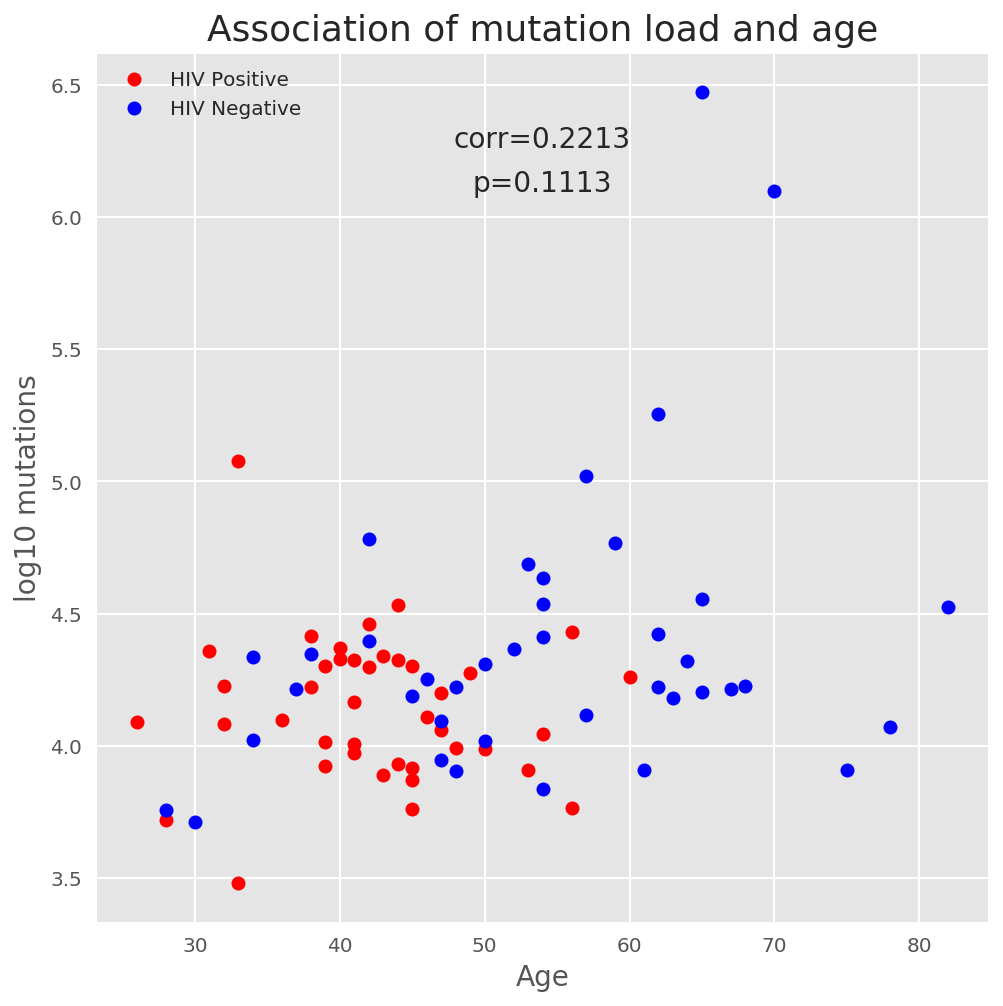

In [113]:


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
clr = ['red', 'blue']
for k, hiv in enumerate(['Positive', 'Negative']):
    adf = ndf.query('{0} == "{1}"'.format('reanne_HIV_status',hiv))
    ax.plot(adf.age_at_diagnosis, adf.log10_strelka_total, mfc = clr[k], 
            mec='k', ms=7, marker="o", linestyle="None", label="{0} {1}".format('HIV',hiv))

_ = ax.text(0.5, 0.85,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14 )
_ = ax.text(0.5, 0.9,'corr={}'.format(cor), ha='center', va='center', transform=ax.transAxes, size=14 )
plt.title('Association of mutation load and age', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('log10 mutations',fontsize=14)
plt.legend(loc='upper left')

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_4.png'
plt.savefig(of1, dpi=200)

cd4 count ranges from 500 to 1500 in healthy human being, cd4<200 indicates advanced hiv disease

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b356a94a8>]], dtype=object)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


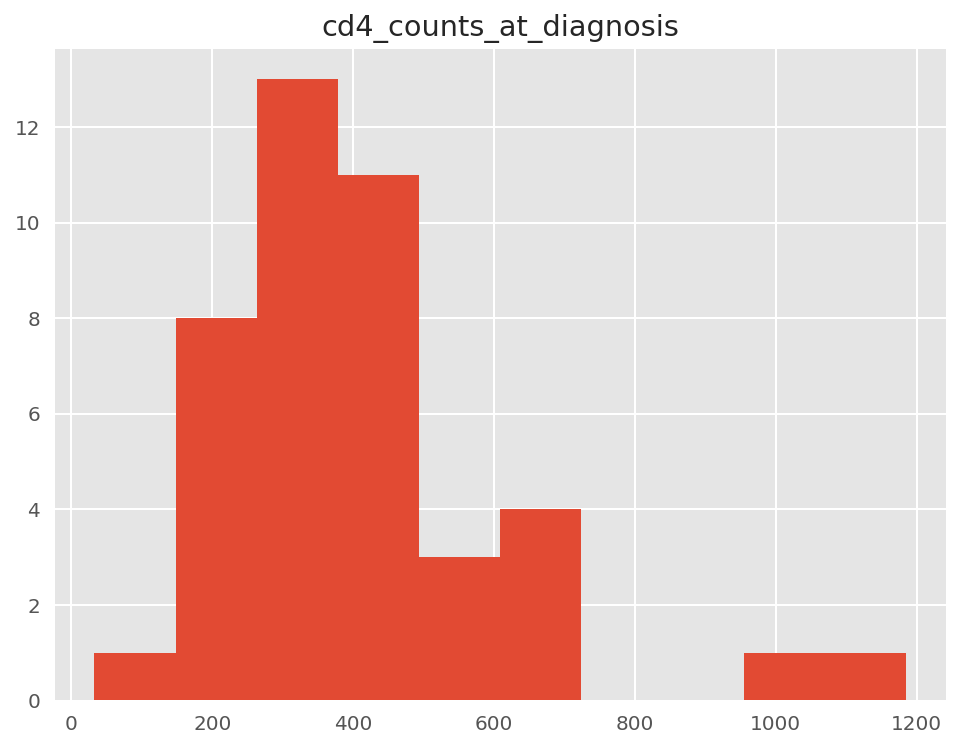

In [4]:
cdf[cdf['cd4_counts_at_diagnosis'].notnull()][['cd4_counts_at_diagnosis', 'haart_therapy_at_dx', 'haart_therapy_prior_to_dx']].sort_values('cd4_counts_at_diagnosis').hist()

# Mutation load

In [283]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/strelka_all_mutations_and_hm_mutations.csv'
df = pd.read_csv(f, index_col='patient', sep='\t')
df.head(2)
df.shape

,strelka_indel,strelka_snv,strelka_total,log10_strelka_total,hm_snvs,hm_indels,log10_hmtotal,putative_Histology,HIV_status,combo
patient,,,,,,,,,,
HTMCP-03-06-02007,29850,2928432,2958282,6.47104,16449,50,4.217458,Adeno,Negative,Adeno_-
HTMCP-03-06-02026,6854,1245363,1252217,6.09768,6119,10,3.787390,Adeno,Negative,Adeno_-


(100, 10)

In [284]:
df['hm_total'] = df.hm_snvs + df.hm_indels

In [285]:
df.head()

,strelka_indel,strelka_snv,strelka_total,log10_strelka_total,hm_snvs,hm_indels,log10_hmtotal,putative_Histology,HIV_status,combo,hm_total
patient,,,,,,,,,,,
HTMCP-03-06-02007,29850,2928432,2958282,6.471040,16449,50,4.217458,Adeno,Negative,Adeno_-,16499
HTMCP-03-06-02026,6854,1245363,1252217,6.097680,6119,10,3.787390,Adeno,Negative,Adeno_-,6129
HTMCP-03-06-02047,471,8363,8834,3.946157,83,3,1.934498,Adeno,Negative,Adeno_-,86
HTMCP-03-06-02074,685,14502,15187,4.181472,124,4,2.107210,Adeno,Negative,Adeno_-,128
HTMCP-03-06-02075,594,33951,34545,4.538385,326,8,2.523746,Adeno,Negative,Adeno_-,334


In [286]:
# data are not normally distributed
ss.normaltest(df.strelka_total)
ss.normaltest(df.log10_strelka_total)
ss.normaltest(df.query('HIV_status=="Positive"')['strelka_total'])
ss.normaltest(df.query('HIV_status=="Negative"')['strelka_total'])

NormaltestResult(statistic=193.85481154110752, pvalue=8.0345679616365238e-43)

NormaltestResult(statistic=74.725091679802375, pvalue=5.9381684317162033e-17)

NormaltestResult(statistic=67.845187069409008, pvalue=1.8518457792365608e-15)

NormaltestResult(statistic=96.2916765736841, pvalue=1.2317656970182003e-21)

0 0 is 0.08562770807905214
0 1 is 0.24827480937694246
1 0 is 0.0869719411493887
1 1 is 0.21445310193418377


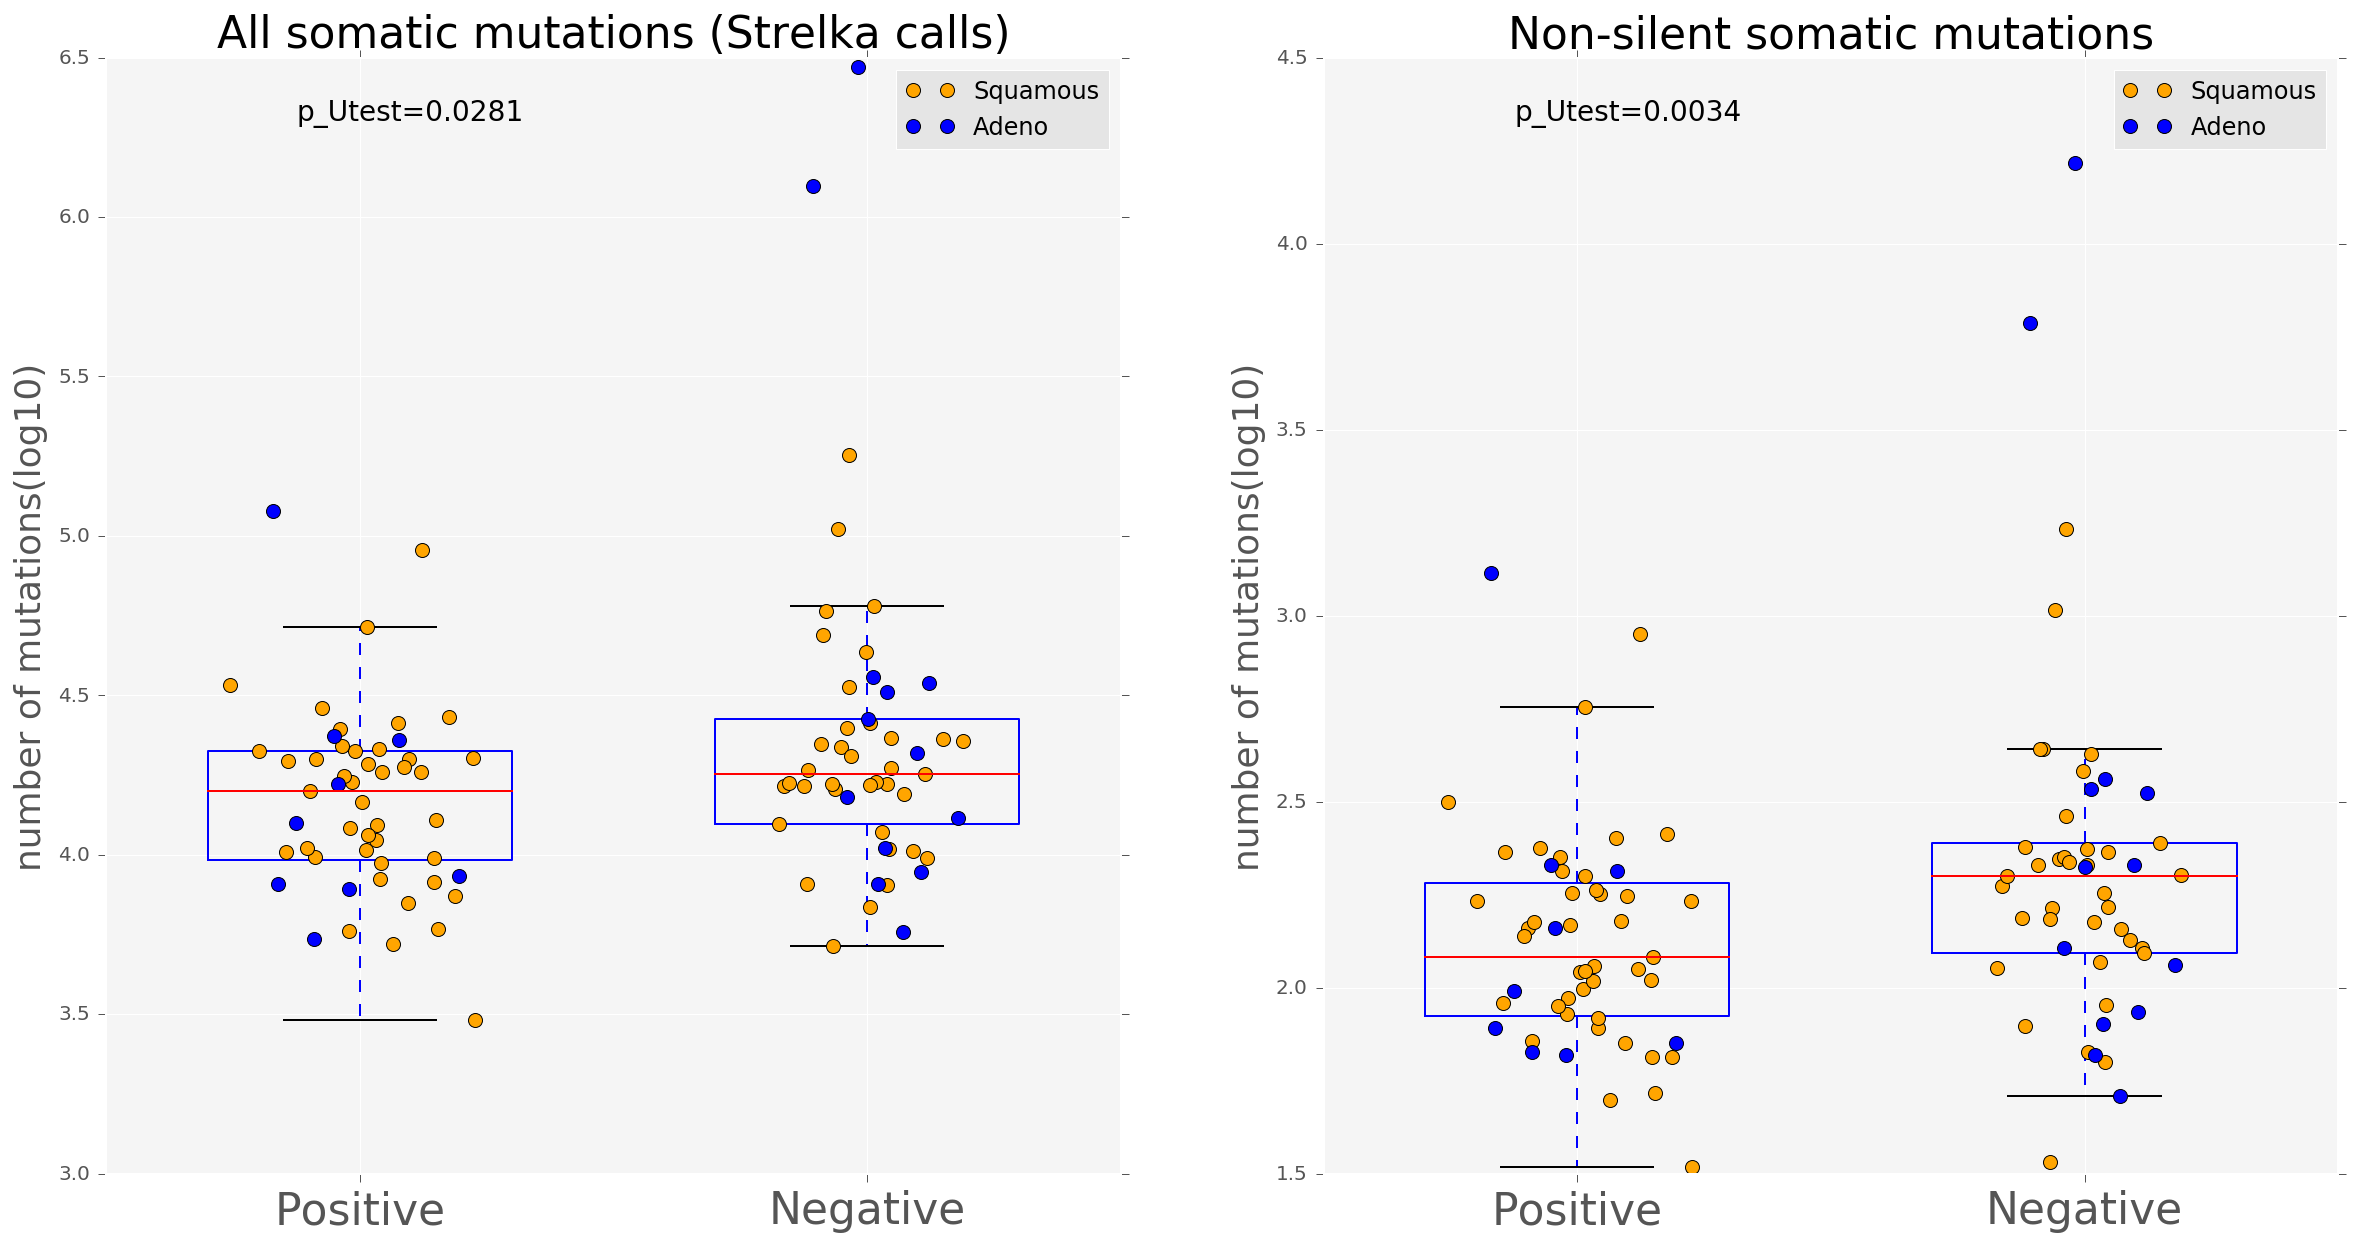

In [307]:

value_cols = ['log10_strelka_total', 'log10_hmtotal']
# value_cols = ['strelka_total', 'hm_total']
titles = ['All somatic mutations (Strelka calls)', 'Non-silent somatic mutations']
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/2.0), 2, figsize=(20, 10))
axes = axes.ravel()
# group_col = 'combo'
group_col = 'HIV_status'
tissue_col = 'putative_Histology'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
            lb = '' if i == 0 else tissue
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
#         show the unequal variance of each group, not equal
        print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
    # statistical test for 1st grp
    stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
#     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
    p_U = round(p_U, 4)
#     p_T = round(p_T, 4)
    _ = ax.text(0.3, 0.95,'p_Utest={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
#     _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=22)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=22)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=18)
    ax.grid(True)
    _ = ax.legend(scatterpoints=1,
              loc='upper right',
              ncol=1,
              fontsize=12)
plt.suptitle('', fontsize=14)       
# plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/mutations_load_HIV_plots.png', dpi=200)


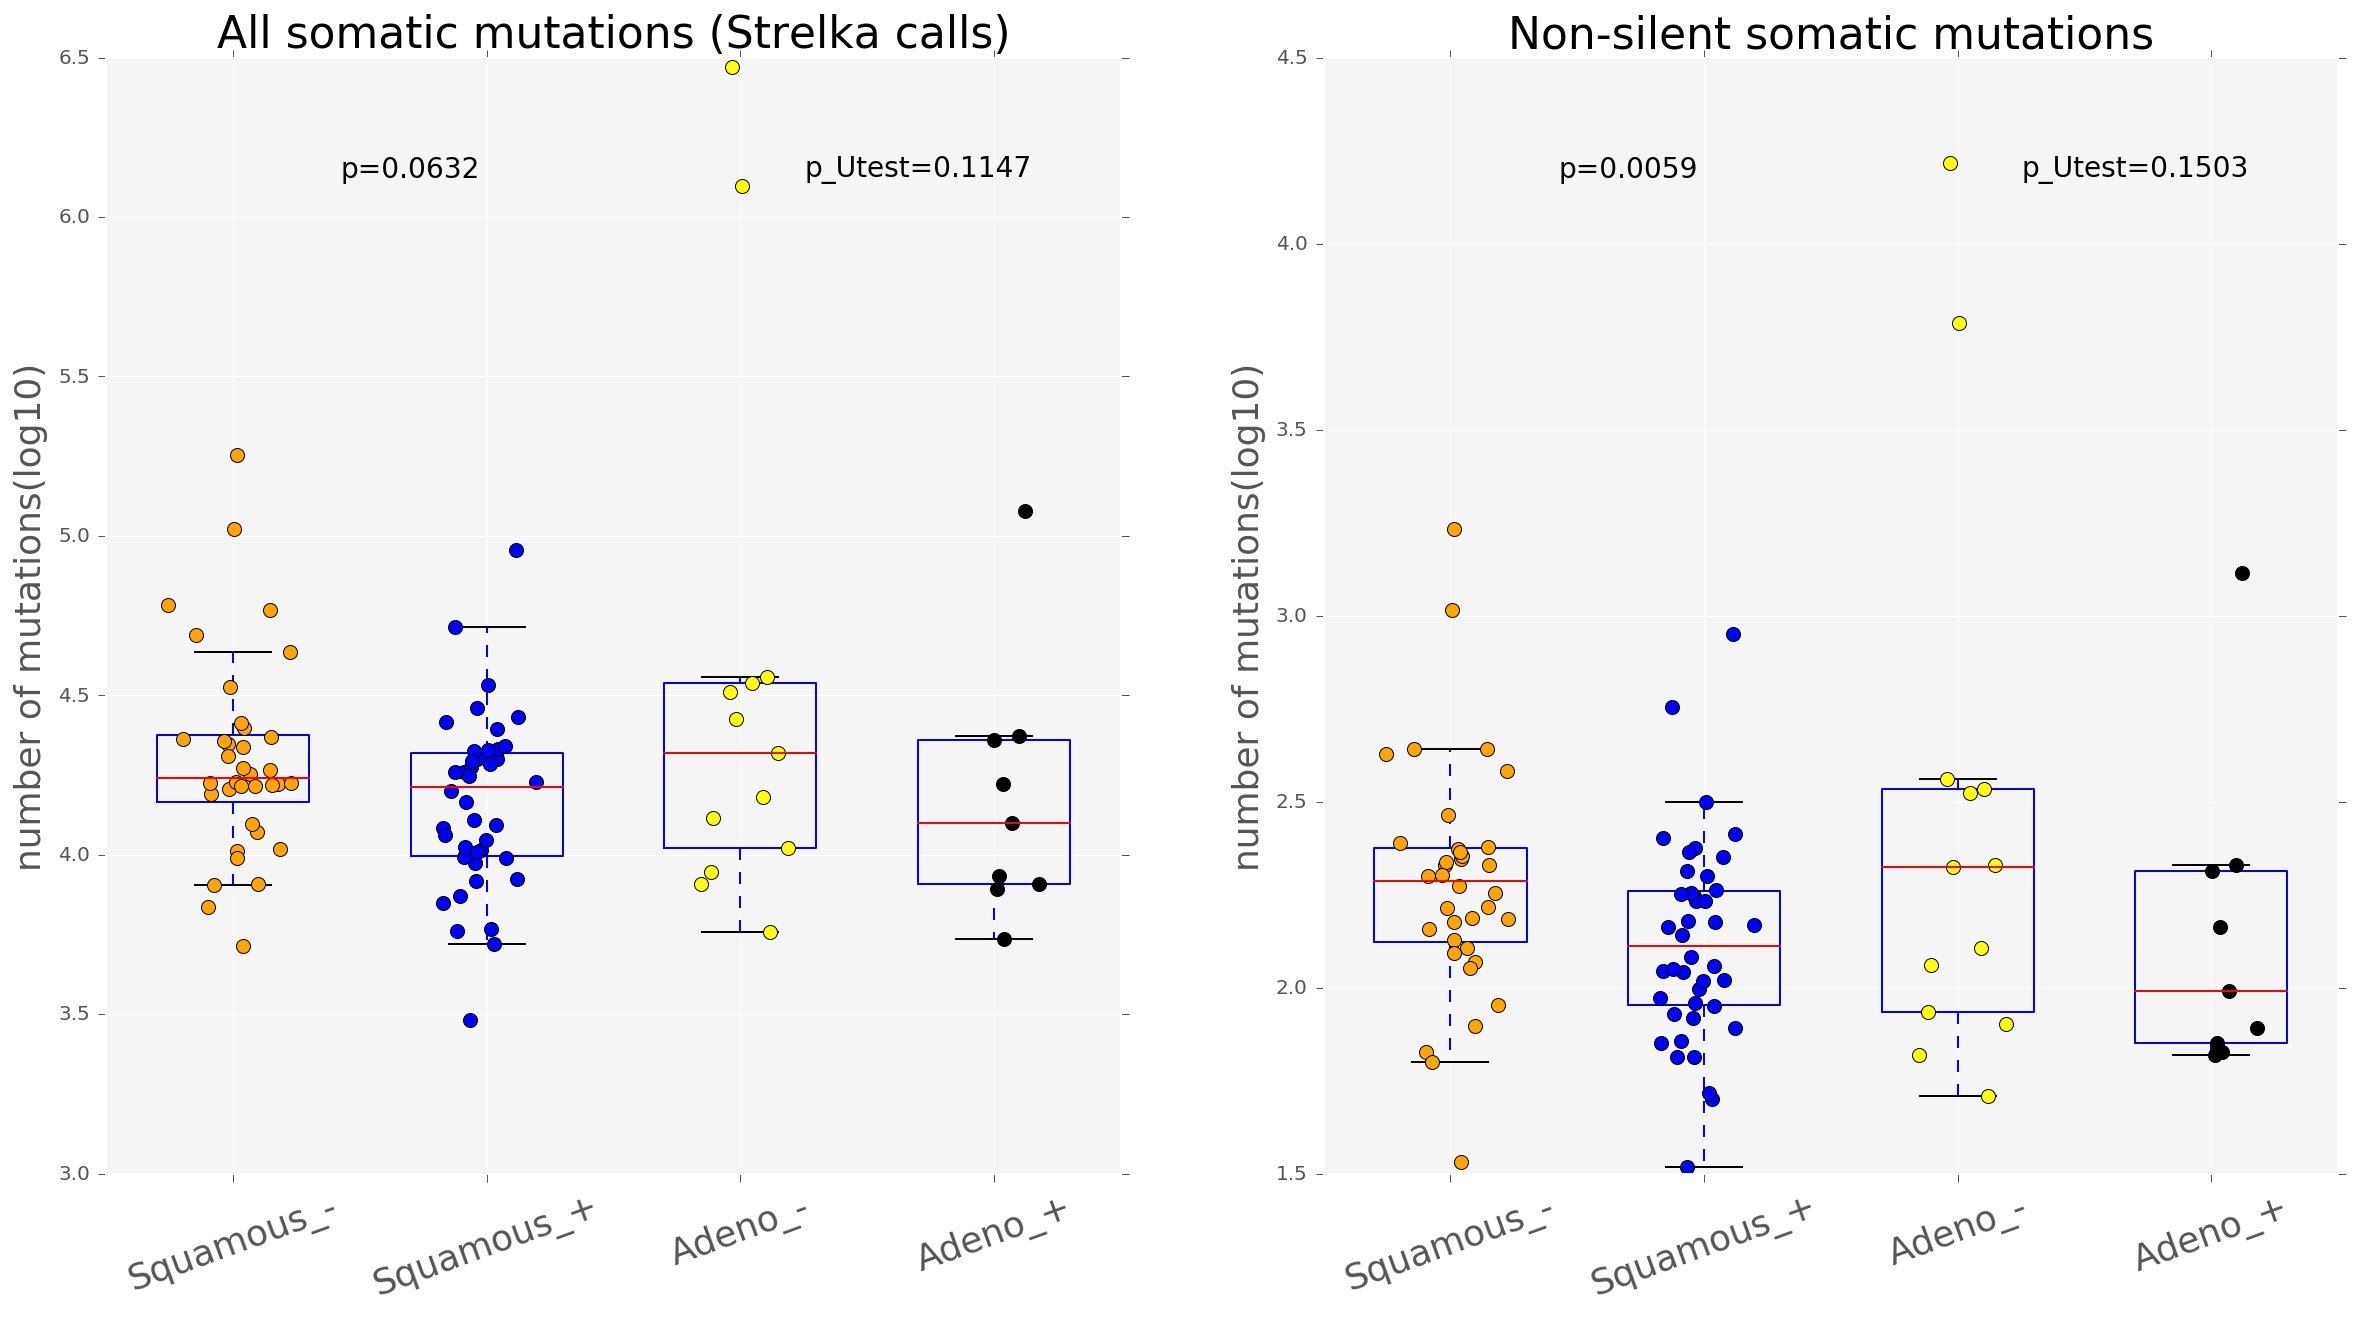

In [312]:
# separate into squamous and adeno, test HIV status difference.
value_cols = ['log10_strelka_total', 'log10_hmtotal']
titles = ['All somatic mutations (Strelka calls)', 'Non-silent somatic mutations']
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/2.0), 2, figsize=(20, 10))
axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.3, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p_Utest={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=20)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=22)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=18)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

# plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/mutations_load_separate_by_histology_and_HIV_plots.png', dpi=200)


# hypergeometric test:
The hypergeometric distribution models drawing objects from a bin. M is the total number of objects, n is total number of Type I objects. The random variate represents the number of Type I objects in N drawn without replacement from the total population.

sf(k, M, n, N, loc=0)	Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

ss.hypergeom.sf(45,(92+7518),92,1329)

In [25]:
1 - ss.hypergeom.cdf(12, 101, 35, 51)

0.98507771045160275

Suppose we have a collection of 20 animals, of which 7 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 12 of the 20 animals, we can initialize a frozen distribution and plot the probability mass function:

In [8]:
ss.hypergeom.sf(6, 20, 7, 12)

0.010216718266253847

In [31]:
# all patients
# ss.hypergeom.sf(23, 101, 35, 50)
[M, n, N] = [101, 35, 51]
rv = ss.hypergeom(M, n, N)
pmf_dogs = rv.pmf(12)
print(pmf_dogs)


0.0102353446276


In [32]:
# squamous patients
# ss.hypergeom.sf(23, 101, 35, 50)
[M, n, N] = [79, 27, 42]
rv = ss.hypergeom(M, n, N)
pmf_dogs = rv.pmf(10)
print(pmf_dogs)

0.0229763280912


In [34]:
# adeno patients
# ss.hypergeom.sf(23, 101, 35, 50)
[M, n, N] = [22, 8, 13]
rv = ss.hypergeom(M, n, N)
pmf_dogs = rv.pmf(6)
print(pmf_dogs)

0.193188854489


In [39]:
observed = np.array([[39, 27],[12, 23]])
ss.chi2_contingency(observed)

(4.6810340802987849,
 0.030497384924984557,
 1,
 array([[ 33.32673267,  32.67326733],
        [ 17.67326733,  17.32673267]]))

In [37]:
[20., 20., 0., 0.]

[20.0, 20.0, 0.0, 0.0]

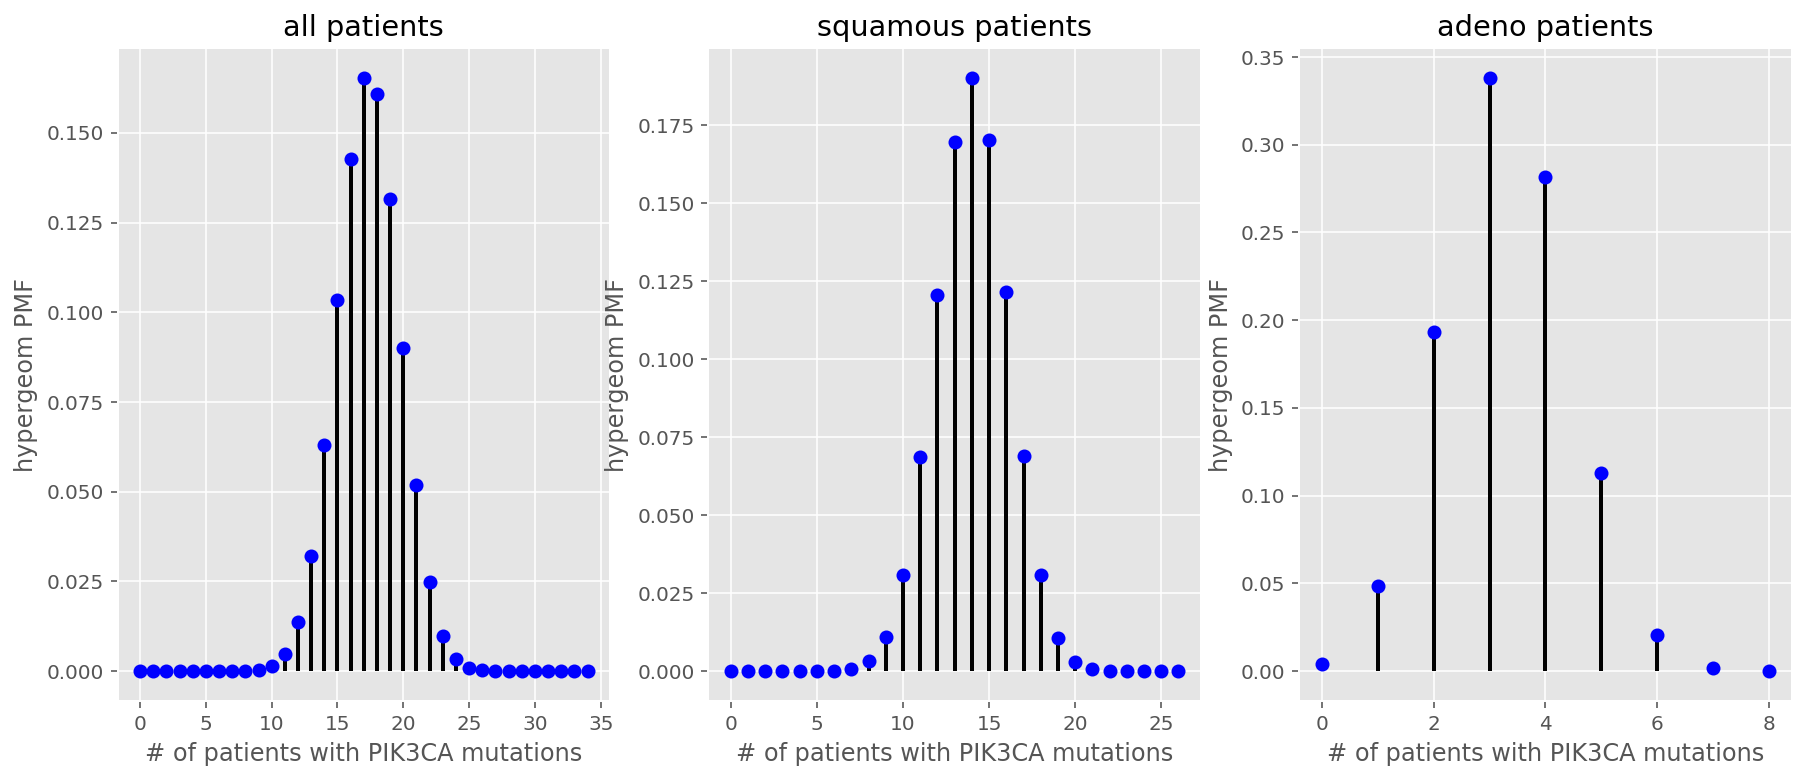

In [13]:
pat_grps = ['all patients', 'squamous patients', 'adeno patients']
MnN = [[100, 34, 51], [78, 26, 42], [22, 8, 9]]
# [M, n, N] = [100, 34, 51]
# rv = ss.hypergeom(M, n, N)
# x = np.arange(0, n+1)
# pmf = rv.pmf(x)
# fig = plt.figure(figsize=(8,6))
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for k, grp in enumerate(pat_grps):
#     ax = fig.add_subplot(111)
    ax = axes[k]
    [M, n, N] = MnN[k]
    rv = ss.hypergeom(M, n, N)
    x = np.arange(0, n+1)
    pmf = rv.pmf(x)
    _ = ax.plot(x, pmf, 'bo')
    _ = ax.vlines(x, 0, pmf, lw=2)
    _ = ax.set_xlabel('# of patients with PIK3CA mutations')
    _ = ax.set_ylabel('hypergeom PMF')
    _ = ax.set_title(grp)
    # plt.show()
plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/PIK3CA_hypergeometric_test.png', dpi=200)

comparing number of SNVS + INDELS (high and moderate impact variants only) between hiv + and - 
It make more sense to look at all somatic impact type when comparing mutational load

In [140]:
# get somatic snvs
df_snvs = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered.tsv', skiprows=312,sep='\t')
df_snvs = df_snvs.query('patient_ID != "HTMCP-03-06-02061_Malignant"')
assert ('HTMCP-03-06-02061_Malignant' in df_snvs.index) == False
df_snvs.head(2)

,gene,num_patients_gene_level,num_SNVs_gene_level,chromosome,position,ref_base,alt_base,num_patients_SNV_level,patient_ID,snp_ID,...,t_RNA_RefC,t_RNA_AltC,t_RNA_AF,adj_t_RNA_cov_valid_bases,RNA_tc,adj_t_Quality_filter,snv_key,filtered_num_patients_gene_level,filtered_num_SNVs_gene_level,filtered_num_patients_SNV_level
0,TACR1,3,4,2,75425843,T,C,1,HTMCP-03-06-02026_Malignant,novel_snp,...,0,0,0.0,na,65,1.0,2:75425843:T:C,2,3,1
1,TACR1,3,4,2,75425876,C,A,1,HTMCP-03-06-02026_Malignant,novel_snp,...,0,0,0.0,na,65,1.0,2:75425876:C:A,2,3,1


In [141]:
# df_snvs.query('gene == "PIK3CA"')[['gene', 'patient_ID']].sort_values('patient_ID')['patient_ID'].unique().shape
df_snvC = pd.DataFrame(df_snvs['patient_ID'].value_counts())
df_snvC.rename(columns ={'patient_ID':'num_snvs'}, inplace=True)
df_snvC.describe()
df_snvC.head()

,num_snvs
count,100.000000
mean,428.380000
std,1739.305601
min,32.000000
25%,92.750000
50%,149.500000
75%,221.250000
max,16449.000000


,num_snvs
HTMCP-03-06-02007_Malignant,16449
HTMCP-03-06-02026_Malignant,6119
HTMCP-03-06-02063_Malignant,1703
HTMCP-03-06-02058_Malignant,1296
HTMCP-03-06-02214_Malignant,1031


In [142]:
# df_snvC.head(2)

# get strelka indel calls
df_indels = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/HIGH_MODERATE_INDEL_summary_with_normal_strelka_only.tsv', sep='\t')
df_indels = df_indels.query('patient_ID != "HTMCP-03-06-02061_Malignant"')
assert ('HTMCP-03-06-02061_Malignant' in df_indels.index) == False
df_indels.head()

,gene,num_patients_gene_level,num_INDELs_gene_level,chromosome,position,ref_base,alt_base,num_patients_INDEL_level,patient_ID,snp_ID,...,pileup_AltC,pileup_AF,strelka_n_Cov,strelka_n_RefC,strelka_n_AltC,strelka_n_AF,strelka_t_Cov,strelka_t_RefC,strelka_t_AltC,strelka_t_AF
0,ZNF434,2,2,16,3447787,CCTTCACTCTGGTT,C,1,HTMCP-03-06-02109_Malignant,novel_snp,...,na,na,45,53,0,0.0,97,83,16,0.16
1,IFFO1,1,2,12,6660561,C,CA,1,HTMCP-03-06-02098_Malignant,novel_snp,...,na,na,26,26,0,0.0,71,37,21,0.36
2,ARMC1,1,2,8,66516650,T,TA,1,HTMCP-03-06-02185_Malignant,novel_snp,...,na,na,27,25,0,0.0,71,43,22,0.34
3,PLEKHH2,16,3,2,43926934,T,TG,1,HTMCP-03-06-02185_Malignant,novel_snp,...,na,na,31,30,0,0.0,67,46,16,0.26
4,HEATR4,2,3,14,73987598,CAA,C,1,HTMCP-03-06-02007_Malignant,novel_snp,...,na,na,39,39,0,0.0,71,51,15,0.23


In [143]:
# indel counts
df_indC = pd.DataFrame(df_indels['patient_ID'].value_counts())
df_indC.rename(columns ={'patient_ID':'num_indels'}, inplace=True)
df_indC.describe()
df_indC.head(2)

,num_indels
count,84.000000
mean,4.845238
std,6.244987
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,50.000000


,num_indels
HTMCP-03-06-02007_Malignant,50
HTMCP-03-06-02185_Malignant,24


In [144]:
df_mrg = pd.merge(df_snvC, df_indC, left_index=True, right_index=True, how='outer')
assert ('HTMCP-03-06-02061_Malignant' in df_mrg.index) == False
df_mrg = df_mrg.fillna(0)
df_mrg.head()
df_mrg.describe()
df_mrg.shape

,num_snvs,num_indels
HTMCP-03-06-02001_Malignant,247,11.0
HTMCP-03-06-02002_Malignant,178,2.0
HTMCP-03-06-02003_Malignant,75,3.0
HTMCP-03-06-02006_Malignant,206,16.0
HTMCP-03-06-02007_Malignant,16449,50.0


,num_snvs,num_indels
count,100.000000,100.00000
mean,428.380000,4.07000
std,1739.305601,5.99032
min,32.000000,0.00000
25%,92.750000,1.00000
50%,149.500000,3.00000
75%,221.250000,5.00000
max,16449.000000,50.00000


(100, 2)

In [145]:
df_mrg['xxx']= df_mrg.index
df_mrg['patient'] = df_mrg['xxx'].apply(lambda x: x.replace('_Malignant', ''))
df_mrg.drop('xxx', axis=1, inplace=True)

In [146]:
df_mrg.set_index('patient', inplace=True)
df_mrg['log10_total'] = np.log10(df_mrg.sum(axis=1))
df_mrg.head(2)

,num_snvs,num_indels,log10_total
patient,,,
HTMCP-03-06-02001,247,11.0,2.411620
HTMCP-03-06-02002,178,2.0,2.255273


In [147]:
df_clinic = pd.read_excel('/projects/trans_scratch/validations/workspace/szong/Cervical/E6_E7_expression/Cervical_integration_expression_mastertable_reviewed.xls')
df_clinic.set_index('patient', inplace=True)
df_clinic.head(2)

df_clinic = df_clinic[['putative_Histology', 'HIV_status']]
df_clinic.head(2)
df_clinic.shape

,hiv_nationwide,cd4counts_nationwide,hist_nationwide,keratinization_nationwide,dna_library,source_ID,putative_Histology,library_RNA,RNA_all_strains_integration_status,HIV_status,...,hist_col,integration,x,hpv16_2_E6,hpv16_2_E7,hpv16_E6,hpv16_E7,hpv18_E6,hpv18_E7,rna_chastity_passed_reads
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02202,Positive,437,squamouscellcarcinoma,Keratinizing,A57085,HTMCP_400,Squamous,A57112,integrated,Positive,...,red,0,-0.7,1237.2,4162.1,1315.8,4155.4,0,0,307193606
HTMCP-03-06-02240,Positive,611,squamouscellcarcinoma,Non-Keratinizing,A57096,HTMCP_411,Squamous,A57123,integrated,Positive,...,red,0,-1,0,0,0,0,0,0,311167934


,putative_Histology,HIV_status
patient,,
HTMCP-03-06-02202,Squamous,Positive
HTMCP-03-06-02240,Squamous,Positive


(101, 2)

,num_snvs,num_indels,log10_total
count,100.000000,100.00000,100.000000
mean,428.380000,4.07000,2.224587
std,1739.305601,5.99032,0.400973
min,32.000000,0.00000,1.518514
25%,92.750000,1.00000,1.969606
50%,149.500000,3.00000,2.181834
75%,221.250000,5.00000,2.350732
max,16449.000000,50.00000,4.217458


Positive


Negative


/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


Mann Whitney U test on log10_total comparing HIV_status


MannwhitneyuResult(statistic=857.0, pvalue=0.0034351756863441043)

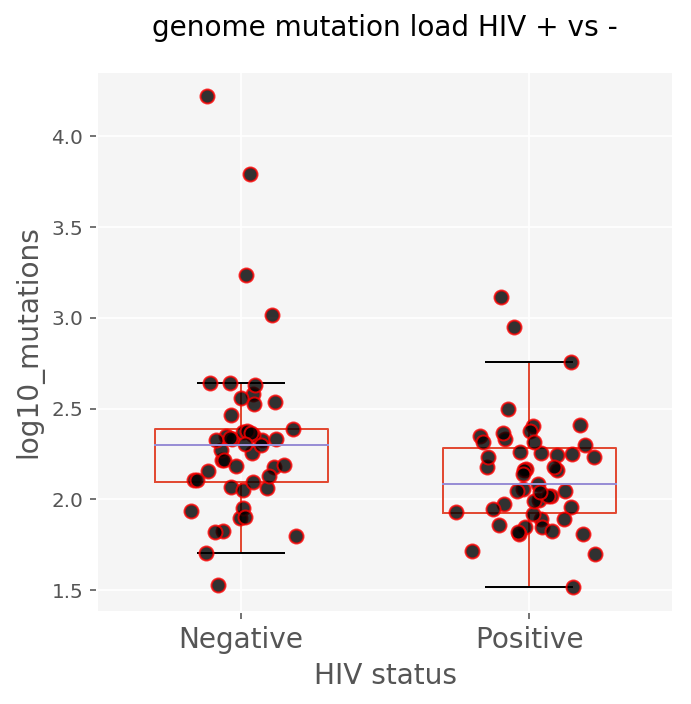

In [148]:
hm_mutations = df_mrg.join(df_clinic, how='inner')
hm_mutations.fillna(0, inplace=True);

hm_mutations.describe()

fig = plt.figure()
group_col = 'HIV_status'
value_col = 'log10_total'
ax = hm_mutations.boxplot(column=value_col, by=group_col, showfliers=False, widths=(0.6,0.6), figsize=(5,5))
plt.title('') # this removes the column as subtitle of the plot
fig = ax.get_figure()
# fig.suptitle('')

np.random.seed(0)
# overlay actuall data points
categories = hm_mutations[group_col].unique().tolist()
for category in categories:
    y = hm_mutations[value_col][hm_mutations[group_col]==category]
#     i = categories.index(category) + 1
    print(category)
    if category == 'Positive':
#     if category == 'Adeno':
        i = 2
    elif category == 'Negative':
#     elif category == 'Squamous':
        i = 1
    # add jitter and specify maker facecolor and edgecolor
    x = np.random.normal(i, 0.1, size=len(y))
    plt.plot(x, y, 'o', markerfacecolor='black',markeredgecolor='red', markersize=7, alpha=0.8)

# ax.set_ylim(0,0.1)
ax.set_axis_bgcolor('whitesmoke') #specify plot backgroup color
ax.tick_params(axis='x', labelsize=14) #specify x tick label size
plt.xlabel("HIV status", fontsize=14) 
plt.ylabel('log10_mutations', fontsize=14)
plt.suptitle('genome mutation load HIV + vs -', fontsize=14)  # get rid of the automatically generated title
plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/101_patients/mutation_load_101_patients.png', dpi=200)

# statistical test 
print('Mann Whitney U test on {0} comparing {1}'.format(value_col, group_col))
Negative = hm_mutations[hm_mutations[group_col]=='Negative']
# Negative = hm_mutations[hm_mutations[group_col]=='Squamous']
Positive = hm_mutations[hm_mutations[group_col]=='Positive']
# Positive = hm_mutations[hm_mutations[group_col]=='Adeno']
# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative[value_col], Positive[value_col], use_continuity=True, alternative=None)

# plot KMT2 gene family

In [494]:
df = pd.read_excel('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/KMT2_family_genes.xls', sheetname='KMT2_KDM5')
df.head()

# for f in df.columns:
#     print f

df = df[['gene', 'patient_ID', 'snpeff_details']]
df.head(2)

df['mut_impact'] = df.snpeff_details.apply(lambda x: x.split('(')[0])
df.drop('snpeff_details', axis=1, inplace=True)
df['patient'] = df.patient_ID.apply(lambda x: x.split('_')[0])
df.drop('patient_ID', axis=1, inplace=True)
df.head()

# combine mutation for each patient into one row
def process_grp(grp):
    _df_or_sr = grp.apply(lambda col: ';'.join(col.unique().tolist()))
    _df = _df_or_sr.to_frame().T
    assert _df.shape[0] == 1
    return _df

df_grp = df.groupby(['patient', 'gene']).apply(process_grp).reset_index(level=2, drop=True)

del df_grp['patient']
del df_grp['gene']
df_grp.reset_index(inplace=True)

df_grp['impact_types'] = df_grp.mut_impact.apply(lambda x: 'Multiple' if ';' in x else x)
df_grp.drop('mut_impact', axis=1, inplace=True)
df_grp.head(2)

genes = sorted(df_grp.gene.unique().tolist())

,gene,alias,chromosome,position,ref_base,alt_base,patient_ID,snp_ID,gmaf,cosmic64_ID,...,t_RNA_RefC,t_RNA_AltC,t_RNA_AF,adj_t_RNA_cov_valid_bases,RNA_tc,adj_t_Quality_filter,snv_key,filtered_num_patients_gene_level,filtered_num_SNVs_gene_level,filtered_num_patients_SNV_level
0,KDM5A,KDM5A,12,402207,C,A,HTMCP-03-06-02007_Malignant,novel_snp,gmaf_unknown,not_in_cosmic64,...,127,85,0.4,na,50,1,12:402207:C:A,3,5,1
1,KDM5A,KDM5A,12,438048,G,A,HTMCP-03-06-02204_Malignant,novel_snp,gmaf_unknown,not_in_cosmic64,...,26,33,0.56,na,unknown,1,12:438048:G:A,3,5,1
2,KDM5A,KDM5A,12,402132,C,A,HTMCP-03-06-02007_Malignant,novel_snp,gmaf_unknown,not_in_cosmic64,...,133,78,0.37,na,50,1,12:402132:C:A,3,5,1
3,KDM5A,KDM5A,12,497496,G,T,HTMCP-03-06-02007_Malignant,novel_snp,gmaf_unknown,not_in_cosmic64,...,6,0,0,na,50,1,12:497496:G:T,3,5,1
4,KDM5A,KDM5A,12,422331,C,G,HTMCP-03-06-02210_Malignant,novel_snp,gmaf_unknown,not_in_cosmic64,...,46,16,0.26,na,70,1,12:422331:C:G,3,5,1


,gene,patient_ID,snpeff_details
0,KDM5A,HTMCP-03-06-02007_Malignant,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|aaG/aa...
1,KDM5A,HTMCP-03-06-02204_Malignant,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Ctc/Tt...


,gene,mut_impact,patient
0,KDM5A,NON_SYNONYMOUS_CODING,HTMCP-03-06-02007
1,KDM5A,NON_SYNONYMOUS_CODING,HTMCP-03-06-02204
2,KDM5A,NON_SYNONYMOUS_CODING,HTMCP-03-06-02007
3,KDM5A,NON_SYNONYMOUS_CODING,HTMCP-03-06-02007
4,KDM5A,NON_SYNONYMOUS_CODING,HTMCP-03-06-02210


,patient,gene,impact_types
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION
1,HTMCP-03-06-02002,KMT2D,STOP_GAINED


# now we need to add in patient without mutated genes and genes without mutations

In [495]:
# add in patient id into the dataframe
df_clinic = pd.read_excel('/projects/trans_scratch/validations/workspace/szong/Cervical/E6_E7_expression/Cervical_integration_expression_mastertable_reviewed.xls')
df_clinic = df_clinic[['patient','putative_Histology', 'HIV_status', 'library_RNA']]
df_clinic.head(2)

all_patients = df_clinic.patient.unique()
np.size(all_patients)

df_grp.head()


df_grp.set_index(['patient', 'gene'], inplace=True)
df_patients = list(set([i[0] for i in df_grp.index.unique().tolist()]))
len(df_patients)

df_grp.head()



,patient,putative_Histology,HIV_status,library_RNA
0,HTMCP-03-06-02202,Squamous,Positive,A57112
1,HTMCP-03-06-02240,Squamous,Positive,A57123


101

,patient,gene,impact_types
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION
1,HTMCP-03-06-02002,KMT2D,STOP_GAINED
2,HTMCP-03-06-02007,KDM5A,NON_SYNONYMOUS_CODING
3,HTMCP-03-06-02007,KDM5B,Multiple
4,HTMCP-03-06-02007,KDM5C,NON_SYNONYMOUS_CODING


41

impact_types
patient           gene                        
HTMCP-03-06-02001 KMT2C         CODON_DELETION
HTMCP-03-06-02002 KMT2D            STOP_GAINED
HTMCP-03-06-02007 KDM5A  NON_SYNONYMOUS_CODING
                  KDM5B               Multiple
                  KDM5C  NON_SYNONYMOUS_CODING

In [496]:
for patient in all_patients:
    df_genes = []
    if patient in df_patients:
        df_genes = df_grp.loc[(patient)].index.unique().tolist()
        for gene in genes:
            if gene not in df_genes:
                df_grp.loc[(patient, gene),:] = pd.Series({i:'no_mutation' for i in df_grp.columns}) 

    else:
        for gene in genes:
            df_grp.loc[(patient, gene),:] = pd.Series({i:'no_mutation' for i in df_grp.columns})


In [497]:
df_grp = df_grp.reset_index().sort_values('patient')
df_grp.head(20)

# see if a object is list
df_grp['impact'] = df_grp.impact_types.apply(lambda x: x[0] if not isinstance(x, basestring) else x)
df_grp.head()

df_grp.drop('impact_types', axis=1, inplace=True)
   

,patient,gene,impact_types
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION
224,HTMCP-03-06-02001,KMT2E,[no_mutation]
223,HTMCP-03-06-02001,KMT2D,[no_mutation]
222,HTMCP-03-06-02001,KMT2B,[no_mutation]
221,HTMCP-03-06-02001,KMT2A,[no_mutation]
220,HTMCP-03-06-02001,KDM5C,[no_mutation]
219,HTMCP-03-06-02001,KDM5B,[no_mutation]
225,HTMCP-03-06-02001,SETD1A,[no_mutation]
226,HTMCP-03-06-02001,SETD1B,[no_mutation]
218,HTMCP-03-06-02001,KDM5A,[no_mutation]


,patient,gene,impact_types,impact
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION,CODON_DELETION
224,HTMCP-03-06-02001,KMT2E,[no_mutation],no_mutation
223,HTMCP-03-06-02001,KMT2D,[no_mutation],no_mutation
222,HTMCP-03-06-02001,KMT2B,[no_mutation],no_mutation
221,HTMCP-03-06-02001,KMT2A,[no_mutation],no_mutation


In [488]:
# dictionary to map impact to a numeric
map_dict = {'CODON_DELETION': 0.6,
              'STOP_GAINED': 0.7,
            'no_mutation': 0.1,
            'NON_SYNONYMOUS_CODING':0.5,
            'Multiple':0.9,
            'FRAME_SHIFT}':0.8,
           'Squamous':1.1,
            'Adeno':0.2,
           'Positive':0.3,
           'Negative':1.4 }

In [498]:
# df_grp['impact_color'] = df_grp.impact.map(map_dict)
# df_grp.head()

# df_grp.drop('impact', axis=1,inplace=True)
df_grp.head()

,patient,gene,impact
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION
224,HTMCP-03-06-02001,KMT2E,no_mutation
223,HTMCP-03-06-02001,KMT2D,no_mutation
222,HTMCP-03-06-02001,KMT2B,no_mutation
221,HTMCP-03-06-02001,KMT2A,no_mutation


In [462]:
df_grp.head()

,patient,gene,impact_color
0,HTMCP-03-06-02001,KMT2C,0.6
224,HTMCP-03-06-02001,KMT2E,0.1
223,HTMCP-03-06-02001,KMT2D,0.1
222,HTMCP-03-06-02001,KMT2B,0.1
221,HTMCP-03-06-02001,KMT2A,0.1


In [500]:
# df_clinic.head(2)

merge = pd.merge(df_grp, df_clinic)
merge.head()

merge = merge.sort_values(['HIV_status', 'patient', 'gene'])

# patient_sorter = merge.patient.unique().tolist()

,patient,gene,impact,putative_Histology,HIV_status,library_RNA
0,HTMCP-03-06-02001,KMT2C,CODON_DELETION,Squamous,Positive,A37700
1,HTMCP-03-06-02001,KMT2E,no_mutation,Squamous,Positive,A37700
2,HTMCP-03-06-02001,KMT2D,no_mutation,Squamous,Positive,A37700
3,HTMCP-03-06-02001,KMT2B,no_mutation,Squamous,Positive,A37700
4,HTMCP-03-06-02001,KMT2A,no_mutation,Squamous,Positive,A37700


In [502]:
df_pat = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/HIV_Cervical_101_patients.txt.hiv.sorted', header=None)
patient_sorter = df_pat[0].tolist()

In [504]:
df_pivot = merge.pivot(index='gene', columns='patient', values='impact')
df_pivot.head()

patient,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
KDM5A,no_mutation,no_mutation,no_mutation,no_mutation,NON_SYNONYMOUS_CODING,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
KDM5B,no_mutation,no_mutation,no_mutation,no_mutation,Multiple,no_mutation,no_mutation,no_mutation,no_mutation,NON_SYNONYMOUS_CODING,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
KDM5C,no_mutation,no_mutation,no_mutation,no_mutation,NON_SYNONYMOUS_CODING,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
KMT2A,no_mutation,no_mutation,no_mutation,no_mutation,Multiple,no_mutation,STOP_GAINED,no_mutation,no_mutation,Multiple,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
KMT2B,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,NON_SYNONYMOUS_CODING,no_mutation,no_mutation,NON_SYNONYMOUS_CODING,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation


In [505]:
df_pivot = df_pivot.T

In [506]:
df_pivot.head()

gene,KDM5A,KDM5B,KDM5C,KMT2A,KMT2B,KMT2C,KMT2D,KMT2E,SETD1A,SETD1B
patient,,,,,,,,,,
HTMCP-03-06-02001,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,CODON_DELETION,no_mutation,no_mutation,no_mutation,no_mutation
HTMCP-03-06-02002,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,STOP_GAINED,no_mutation,no_mutation,no_mutation
HTMCP-03-06-02003,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
HTMCP-03-06-02006,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation
HTMCP-03-06-02007,NON_SYNONYMOUS_CODING,Multiple,NON_SYNONYMOUS_CODING,Multiple,no_mutation,Multiple,no_mutation,no_mutation,no_mutation,no_mutation


In [507]:
df_clinic.head()

,patient,putative_Histology,HIV_status,library_RNA
0,HTMCP-03-06-02202,Squamous,Positive,A57112
1,HTMCP-03-06-02240,Squamous,Positive,A57123
2,HTMCP-03-06-02174,Squamous,Negative,A52349
3,HTMCP-03-06-02128,Squamous,Positive,A50343
4,HTMCP-03-06-02151,Squamous,Positive,A54469


In [508]:
df_new = pd.merge(df_pivot, df_clinic, left_index=True, right_on='patient').set_index('patient').drop('library_RNA', axis=1)

In [509]:
df_new.head(2)

gene,KDM5A,KDM5B,KDM5C,KMT2A,KMT2B,KMT2C,KMT2D,KMT2E,SETD1A,SETD1B,putative_Histology,HIV_status
patient,,,,,,,,,,,,
HTMCP-03-06-02001,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,CODON_DELETION,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Positive
HTMCP-03-06-02002,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,STOP_GAINED,no_mutation,no_mutation,no_mutation,Squamous,Negative


In [510]:
df_new

gene,KDM5A,KDM5B,KDM5C,KMT2A,KMT2B,KMT2C,KMT2D,KMT2E,SETD1A,SETD1B,putative_Histology,HIV_status
patient,,,,,,,,,,,,
HTMCP-03-06-02001,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,CODON_DELETION,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Positive
HTMCP-03-06-02002,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,STOP_GAINED,no_mutation,no_mutation,no_mutation,Squamous,Negative
HTMCP-03-06-02003,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Positive
HTMCP-03-06-02006,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Negative
HTMCP-03-06-02007,NON_SYNONYMOUS_CODING,Multiple,NON_SYNONYMOUS_CODING,Multiple,no_mutation,Multiple,no_mutation,no_mutation,no_mutation,no_mutation,Adeno,Negative
HTMCP-03-06-02008,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Negative
HTMCP-03-06-02012,no_mutation,no_mutation,no_mutation,STOP_GAINED,no_mutation,STOP_GAINED,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Negative
HTMCP-03-06-02013,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Negative
HTMCP-03-06-02020,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,STOP_GAINED,no_mutation,no_mutation,no_mutation,no_mutation,Squamous,Positive


In [512]:
df_new.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/KMT2_family_genes_mutations.csv', sep='\t')

In [471]:
df_new['Histology'] = df_new.putative_Histology.map(map_dict)
df_new['HIV'] = df_new.HIV_status.map(map_dict)
df_new.head()

df_new.drop('putative_Histology', axis=1,inplace=True)
df_new.drop('HIV_status', axis=1,inplace=True)
df_new.head()

gene,KDM5A,KDM5B,KDM5C,KMT2A,KMT2B,KMT2C,KMT2D,KMT2E,SETD1A,SETD1B,putative_Histology,HIV_status,Histology,HIV
patient,,,,,,,,,,,,,,
HTMCP-03-06-02001,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.4,0.4,Squamous,Positive,1.1,0.3
HTMCP-03-06-02002,0.4,0.4,0.4,0.4,0.4,0.4,0.7,0.4,0.4,0.4,Squamous,Negative,1.1,1.4
HTMCP-03-06-02003,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,Squamous,Positive,1.1,0.3
HTMCP-03-06-02006,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,Squamous,Negative,1.1,1.4
HTMCP-03-06-02007,0.5,0.9,0.5,0.9,0.4,0.9,0.4,0.4,0.4,0.4,Adeno,Negative,0.2,1.4


gene,KDM5A,KDM5B,KDM5C,KMT2A,KMT2B,KMT2C,KMT2D,KMT2E,SETD1A,SETD1B,Histology,HIV
patient,,,,,,,,,,,,
HTMCP-03-06-02001,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.4,0.4,1.1,0.3
HTMCP-03-06-02002,0.4,0.4,0.4,0.4,0.4,0.4,0.7,0.4,0.4,0.4,1.1,1.4
HTMCP-03-06-02003,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,1.1,0.3
HTMCP-03-06-02006,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,1.1,1.4
HTMCP-03-06-02007,0.5,0.9,0.5,0.9,0.4,0.9,0.4,0.4,0.4,0.4,0.2,1.4


In [472]:
ndf = df_new.reindex(patient_sorter)

In [473]:
ndf = ndf.T

In [474]:
ndf

patient,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02047,HTMCP-03-06-02074,HTMCP-03-06-02075,HTMCP-03-06-02085,HTMCP-03-06-02098,HTMCP-03-06-02099,HTMCP-03-06-02150,HTMCP-03-06-02157,...,HTMCP-03-06-02239,HTMCP-03-06-02240,HTMCP-03-06-02242,HTMCP-03-06-02259,HTMCP-03-06-02260,HTMCP-03-06-02261,HTMCP-03-06-02262,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02330
gene,,,,,,,,,,,,,,,,,,,,,
KDM5A,0.5,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
KDM5B,0.9,0.5,0.4,0.4,0.5,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.5,0.4,0.4,0.4,0.4,0.4
KDM5C,0.5,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
KMT2A,0.9,0.9,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
KMT2B,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4
KMT2C,0.9,0.9,0.4,0.4,0.4,0.4,0.7,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.5
KMT2D,0.4,0.4,0.4,0.7,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.9,0.4,0.4,0.4,0.4,0.4
KMT2E,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
SETD1A,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.5,0.4,0.4,0.4,0.4,0.4


In [479]:
plt.imshow?

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


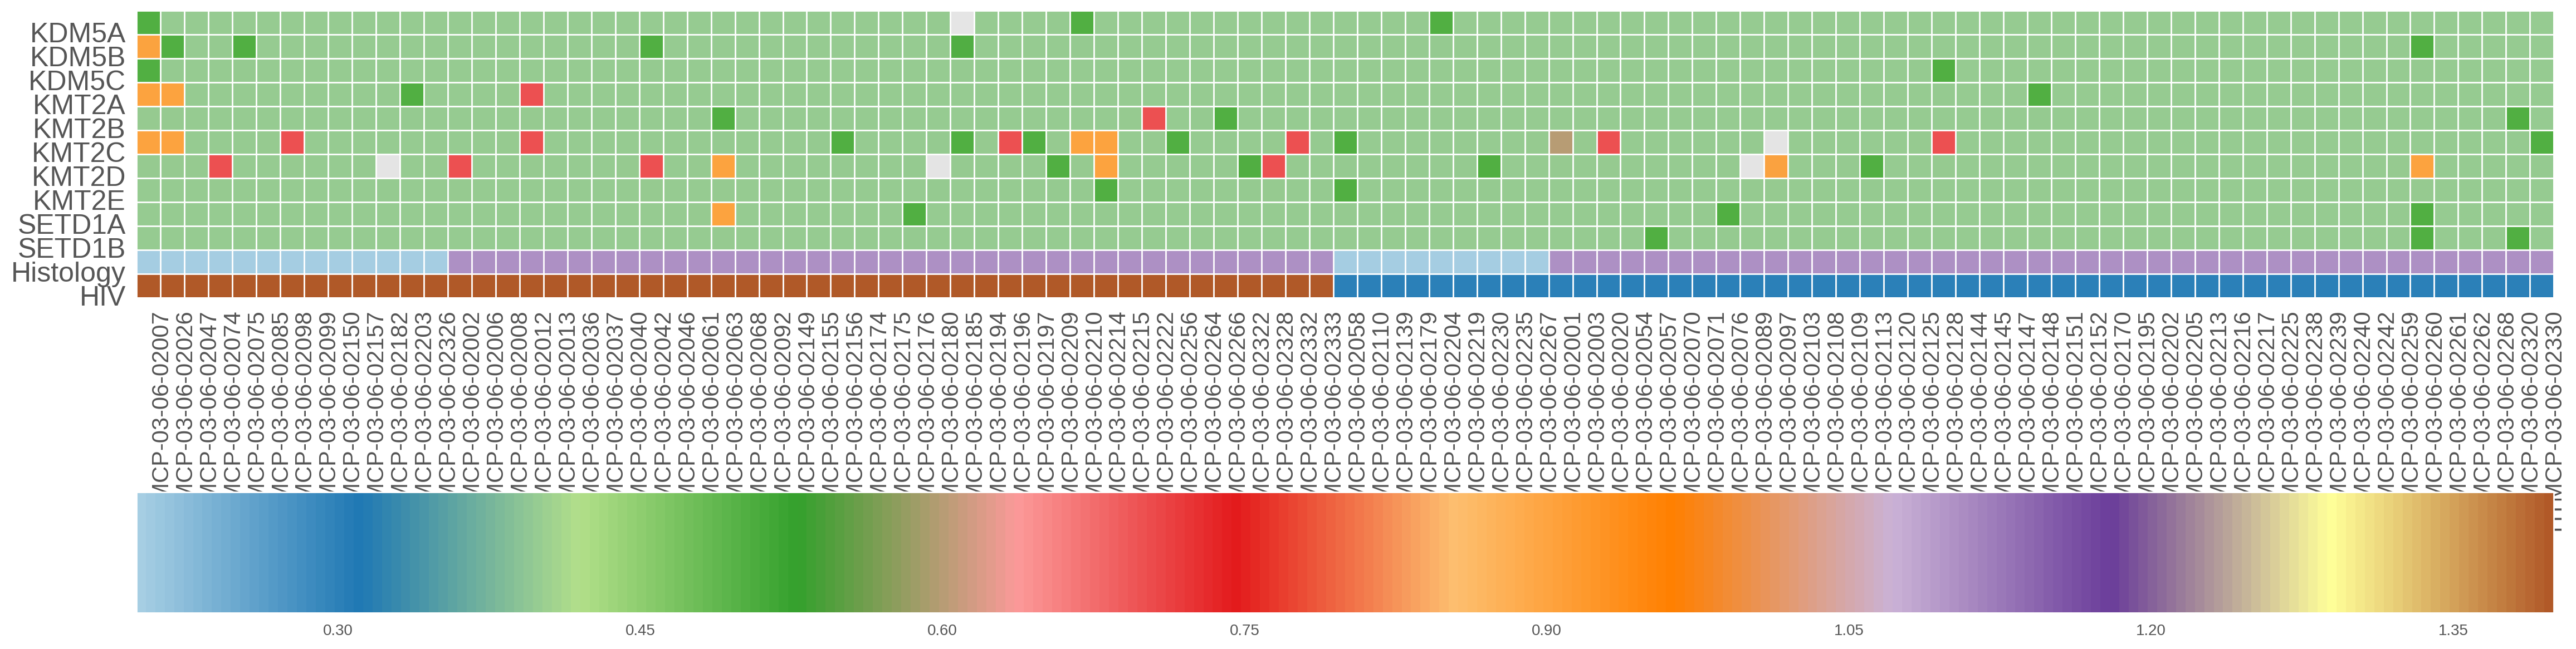

In [513]:
# plt.imshow(df_pivot.values, interpolation='none')
df_pivot = ndf
matplotlib.rcParams['figure.figsize'] = (28, 15)
plt.imshow(df_pivot.values, interpolation='none',  cmap='Paired')
plt.colorbar(orientation='horizontal')
_ = plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index, fontsize=18)
_ = plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns, fontsize=15, rotation=90)
plt.savefig('KMT2_KDM5_mutations.png', dpi=200)

In [455]:
# dictionary to map impact to a numeric
map_dict = {'CODON_DELETION': 0.6,
              'STOP_GAINED': 0.7,
            'no_mutation': 0.1,
            'NON_SYNONYMOUS_CODING':0.5,
            'Multiple':0.9,
            'FRAME_SHIFT}':0.8,
           'Squamous':1.1,
            'Adeno':0.2,
           'Positive':0.3,
           'Negative':1.4 }

In [483]:
pwd

u'/home/szong/projects/development/study'